# S&P500 and SP400 Component Stocks Analysis


Goal: To use time series forecasting techniques to forecast stock returns for each of the firms
in the S&P 900.

Details: To do this you have to download the data for each series which requires some
programming. If you can do it without programming, that is fine. But you must gather
the data.

To forecast the series, you can use any of the tools we have learned. That includes,
linear modeling, arima, arch/garch, etc. You should test the data to make sure it is
stationary (if the occasional series appears nonstationary after first differencing, that’s
okay because you’re going to be testing 900 series). You can filter the data if you think
that will be helpful. It is up to you to find the relationships and show the procedures
that you used.

Deliverables:
- Code you used to download and forecast the data with supporting documentation
(and/or) comments
- A 10 minute (max) presentation on the process and your findings about the data

### Problem: Simulating GARCH(1,1)
### Aim of research: Forecasting volatility/variance of Portfolio Returns.
### Tools used: Python
### Instrument: SP500 and SP400 component stocks minute ticker prices from beginning of 2019.
### Reference material: Quantopian 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn  
sn.set_style('darkgrid')

In [3]:
# Loaded tickers in a csv file and saved the file in the local data directory on quantopian r
sp_tickers = local_csv('tickers.csv') #local_csv() not read_csv()
sp_tickers

,AAN,ACHC,ACIW,ADNT,ATGE,ACM,ACC,AEO,AFG,AGCO,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS


In [4]:
# Drop not common traded stocks which have different classes 
sp_tickers.drop(['GOOGL', 'ATO.1', 'NVR.1', 'ROL.1'], axis = 1, inplace=True)
sp_tickers

,AAN,ACHC,ACIW,ADNT,ATGE,ACM,ACC,AEO,AFG,AGCO,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS


In [5]:
from datetime import datetime
data = get_pricing(sp_tickers, #First we get the daily close prices for the S&P component stocks
            fields='close_price',
            frequency = 'minute',
            start_date='2019-01-02', #From 2018 till last closing trading day 
            end_date= '2019-10-21') #datetime.today()
data

,Equity(523 [AAN]),Equity(42091 [ACHC]),Equity(12616 [ACIW]),Equity(50390 [ADNT]),Equity(2371 [ATGE]),Equity(33831 [ACM]),Equity(26553 [ACC]),Equity(11086 [AEO]),Equity(12980 [AFG]),Equity(197 [AGCO]),...,Equity(22857 [WLTW]),Equity(24124 [WYNN]),Equity(21964 [XEL]),Equity(8354 [XRX]),Equity(8344 [XLNX]),Equity(42023 [XYL]),Equity(17787 [YUM]),Equity(23047 [ZBH]),Equity(8399 [ZION]),Equity(44060 [ZTS])
2019-01-02 14:31:00+00:00,41.135,25.420,27.390,14.980,46.980,26.065,39.788,18.656,86.504,54.579,...,148.370,93.734,48.058,19.003,82.856,65.012,89.900,102.589,39.393,NaN
2019-01-02 14:32:00+00:00,NaN,25.290,NaN,14.970,NaN,26.010,NaN,18.666,NaN,NaN,...,148.618,93.759,48.146,19.022,83.029,64.947,89.969,102.131,39.451,NaN
2019-01-02 14:33:00+00:00,41.554,25.450,NaN,14.980,NaN,26.230,39.613,18.695,NaN,NaN,...,148.796,93.881,47.813,18.963,83.634,64.754,90.019,102.131,39.569,84.014
2019-01-02 14:34:00+00:00,41.324,25.345,NaN,15.030,46.655,26.160,39.497,18.587,86.252,54.172,...,148.796,93.857,47.794,18.983,83.718,64.963,90.009,102.181,39.530,83.955
2019-01-02 14:35:00+00:00,41.644,25.390,27.280,14.990,46.685,26.120,39.264,18.617,NaN,54.301,...,148.454,93.812,47.666,18.949,83.619,64.625,89.890,102.097,39.412,84.134
2019-01-02 14:36:00+00:00,NaN,25.320,27.210,14.960,46.900,26.040,39.235,18.685,85.933,54.053,...,147.955,93.881,47.539,18.954,83.163,64.556,89.949,102.141,39.363,84.074
2019-01-02 14:37:00+00:00,NaN,25.360,27.190,15.000,46.920,26.040,38.973,18.724,NaN,54.242,...,147.955,94.027,47.372,18.993,83.767,64.546,89.762,102.301,39.432,84.263
2019-01-02 14:38:00+00:00,41.504,25.420,27.200,15.150,46.800,NaN,39.109,18.675,86.291,54.430,...,148.044,94.516,47.363,19.032,83.876,64.586,89.782,102.430,39.579,84.099
2019-01-02 14:39:00+00:00,41.504,25.380,27.120,15.060,46.910,26.016,NaN,18.617,NaN,54.262,...,148.044,94.389,47.559,19.012,83.975,64.422,89.811,102.206,39.520,84.106
2019-01-02 14:40:00+00:00,41.354,25.260,27.200,15.125,46.960,26.000,39.264,18.568,86.330,NaN,...,148.252,94.520,47.627,19.003,83.787,64.343,89.782,102.274,39.549,84.233


#### Only 1 year of minute data can be imported due to reserach memory restrictions and a dataframe around 1GB of memory is permitted

This is a violation for high frequency trading as price frictions vary in micro and milliseconds but for the purpose of modeling returnn dispersion, the nan are first filled with previous minute data and the left nan are filled with previous minute data for each stock.

In [6]:
data.fillna(method='ffill', inplace = True)
data.fillna(method='bfill', inplace = True)
np.nanmax(data[data.columns].values)

3945.0

In [7]:
data.head(10)

,Equity(523 [AAN]),Equity(42091 [ACHC]),Equity(12616 [ACIW]),Equity(50390 [ADNT]),Equity(2371 [ATGE]),Equity(33831 [ACM]),Equity(26553 [ACC]),Equity(11086 [AEO]),Equity(12980 [AFG]),Equity(197 [AGCO]),...,Equity(22857 [WLTW]),Equity(24124 [WYNN]),Equity(21964 [XEL]),Equity(8354 [XRX]),Equity(8344 [XLNX]),Equity(42023 [XYL]),Equity(17787 [YUM]),Equity(23047 [ZBH]),Equity(8399 [ZION]),Equity(44060 [ZTS])
2019-01-02 14:31:00+00:00,41.135,25.420,27.39,14.980,46.980,26.065,39.788,18.656,86.504,54.579,...,148.370,93.734,48.058,19.003,82.856,65.012,89.900,102.589,39.393,84.014
2019-01-02 14:32:00+00:00,41.135,25.290,27.39,14.970,46.980,26.010,39.788,18.666,86.504,54.579,...,148.618,93.759,48.146,19.022,83.029,64.947,89.969,102.131,39.451,84.014
2019-01-02 14:33:00+00:00,41.554,25.450,27.39,14.980,46.980,26.230,39.613,18.695,86.504,54.579,...,148.796,93.881,47.813,18.963,83.634,64.754,90.019,102.131,39.569,84.014
2019-01-02 14:34:00+00:00,41.324,25.345,27.39,15.030,46.655,26.160,39.497,18.587,86.252,54.172,...,148.796,93.857,47.794,18.983,83.718,64.963,90.009,102.181,39.530,83.955
2019-01-02 14:35:00+00:00,41.644,25.390,27.28,14.990,46.685,26.120,39.264,18.617,86.252,54.301,...,148.454,93.812,47.666,18.949,83.619,64.625,89.890,102.097,39.412,84.134
2019-01-02 14:36:00+00:00,41.644,25.320,27.21,14.960,46.900,26.040,39.235,18.685,85.933,54.053,...,147.955,93.881,47.539,18.954,83.163,64.556,89.949,102.141,39.363,84.074
2019-01-02 14:37:00+00:00,41.644,25.360,27.19,15.000,46.920,26.040,38.973,18.724,85.933,54.242,...,147.955,94.027,47.372,18.993,83.767,64.546,89.762,102.301,39.432,84.263
2019-01-02 14:38:00+00:00,41.504,25.420,27.20,15.150,46.800,26.040,39.109,18.675,86.291,54.430,...,148.044,94.516,47.363,19.032,83.876,64.586,89.782,102.430,39.579,84.099
2019-01-02 14:39:00+00:00,41.504,25.380,27.12,15.060,46.910,26.016,39.109,18.617,86.291,54.262,...,148.044,94.389,47.559,19.012,83.975,64.422,89.811,102.206,39.520,84.106
2019-01-02 14:40:00+00:00,41.354,25.260,27.20,15.125,46.960,26.000,39.264,18.568,86.330,54.262,...,148.252,94.520,47.627,19.003,83.787,64.343,89.782,102.274,39.549,84.233


### Stationary Test Function

In [27]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary") 

In [10]:
#test our function
adf_test(data[data.columns[100]], data.columns[100])

Augmented Dickey-Fuller Test: Equity(46949 [DNOW])
ADF test statistic         -1.331456
p-value                     0.614661
# lags used                20.000000
# observations          78969.000000
critical value (5%)        -2.861577
critical value (1%)        -3.430433
critical value (10%)       -2.566789
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### Apply Log of prices to get returns for each minute

In [9]:
data = np.log(data/data.shift(1))
data.head()

,Equity(523 [AAN]),Equity(42091 [ACHC]),Equity(12616 [ACIW]),Equity(50390 [ADNT]),Equity(2371 [ATGE]),Equity(33831 [ACM]),Equity(26553 [ACC]),Equity(11086 [AEO]),Equity(12980 [AFG]),Equity(197 [AGCO]),...,Equity(22857 [WLTW]),Equity(24124 [WYNN]),Equity(21964 [XEL]),Equity(8354 [XRX]),Equity(8344 [XLNX]),Equity(42023 [XYL]),Equity(17787 [YUM]),Equity(23047 [ZBH]),Equity(8399 [ZION]),Equity(44060 [ZTS])
2019-01-02 14:31:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 14:32:00+00:00,0.000000,-0.005127,0.000000,-0.000668,0.000000,-0.002112,0.000000,0.000536,0.000000,0.000000,...,0.001670,0.000267,0.001829,0.000999,0.002086,-0.001000,0.000767,-0.004474,0.001471,0.000000
2019-01-02 14:33:00+00:00,0.010134,0.006307,0.000000,0.000668,0.000000,0.008423,-0.004408,0.001552,0.000000,0.000000,...,0.001197,0.001300,-0.006940,-0.003106,0.007260,-0.002976,0.000556,0.000000,0.002987,0.000000
2019-01-02 14:34:00+00:00,-0.005550,-0.004134,0.000000,0.003332,-0.006942,-0.002672,-0.002933,-0.005794,-0.002917,-0.007485,...,0.000000,-0.000256,-0.000397,0.001054,0.001004,0.003222,-0.000111,0.000489,-0.000986,-0.000703
2019-01-02 14:35:00+00:00,0.007714,0.001774,-0.004024,-0.002665,0.000643,-0.001530,-0.005917,0.001613,0.000000,0.002378,...,-0.002301,-0.000480,-0.002682,-0.001793,-0.001183,-0.005217,-0.001323,-0.000822,-0.002990,0.002130


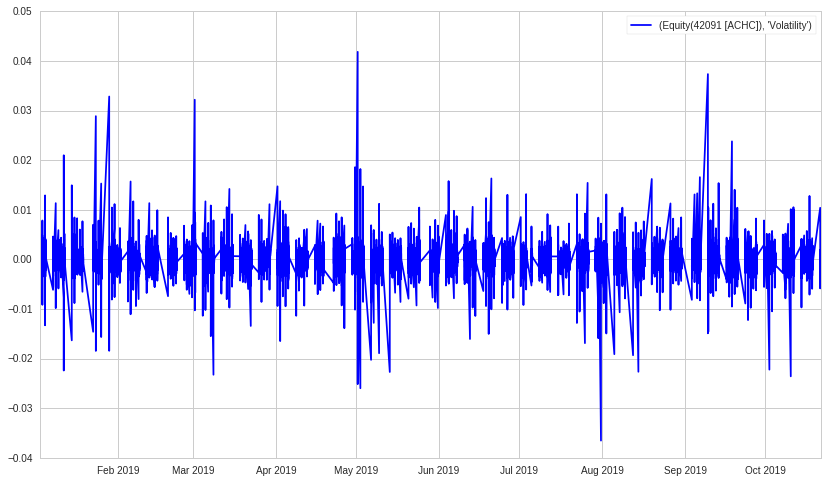

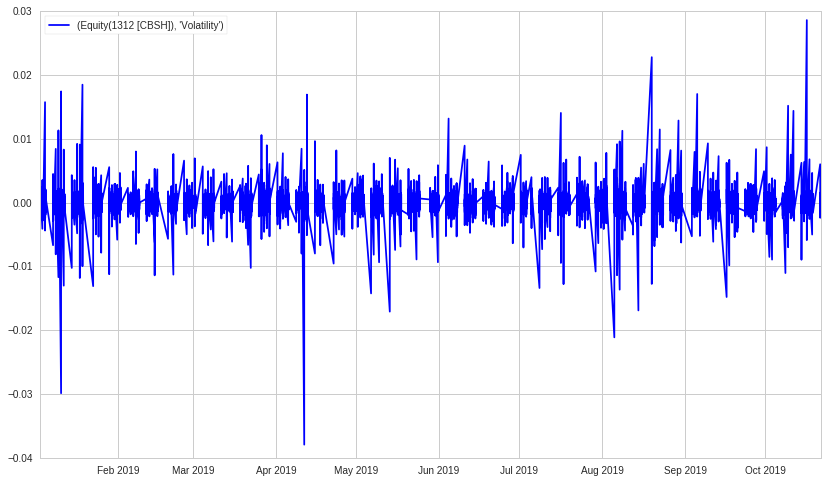

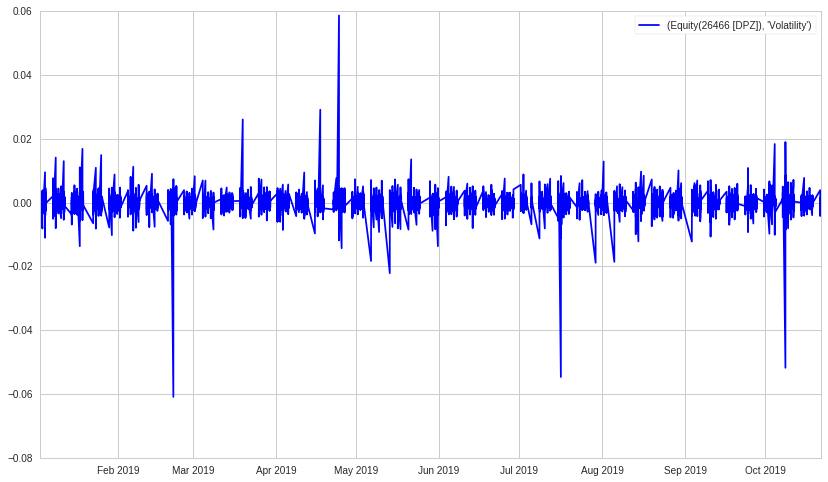

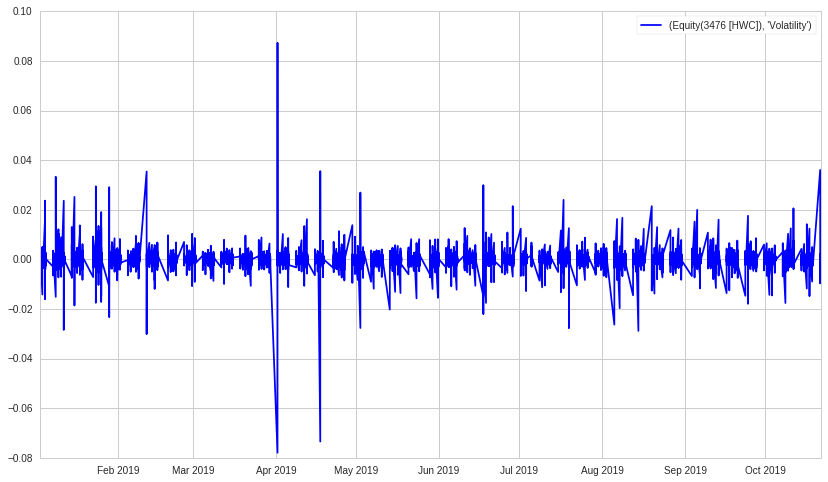

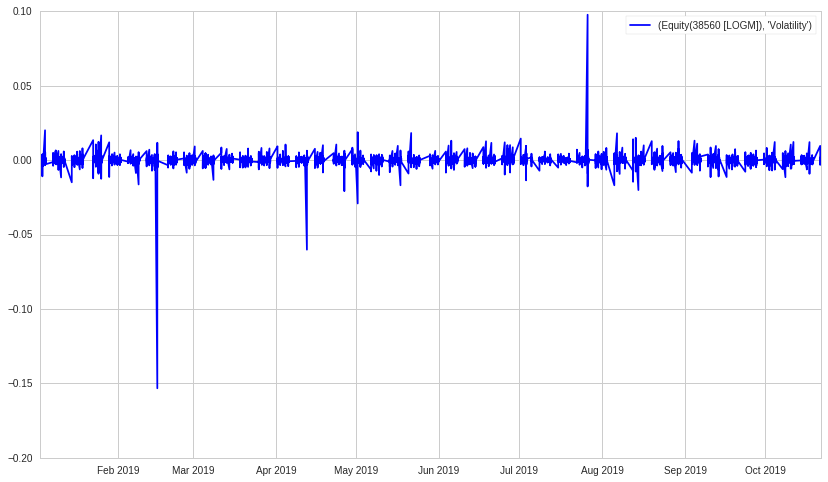

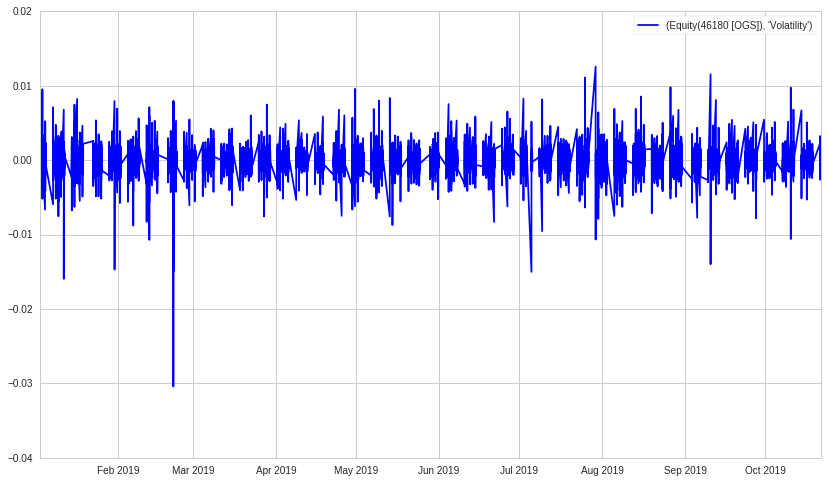

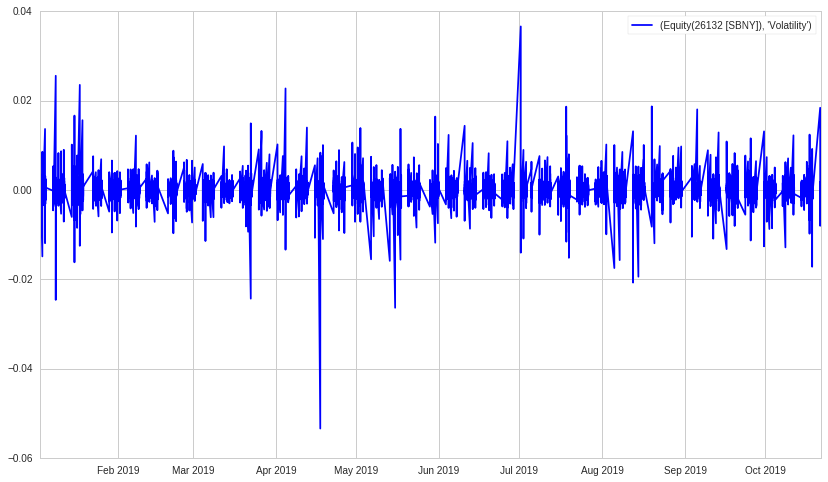

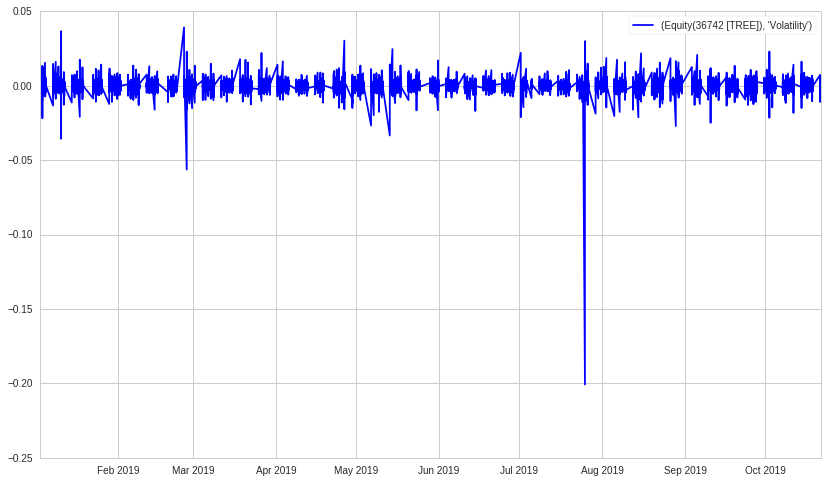

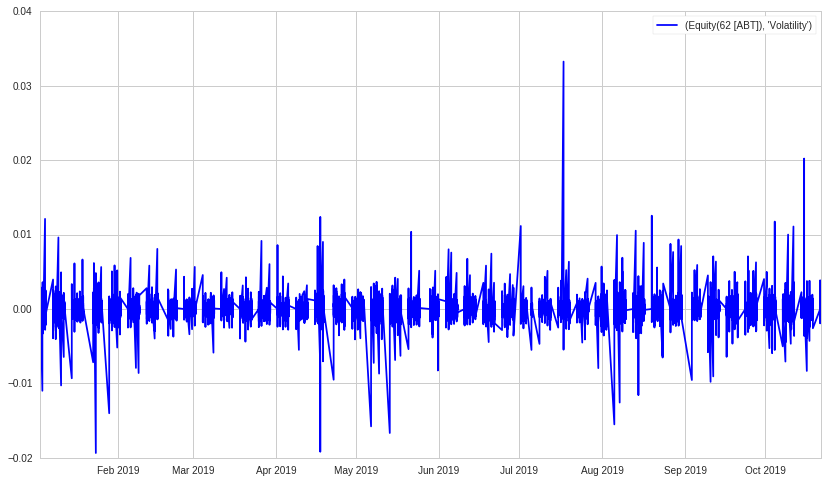

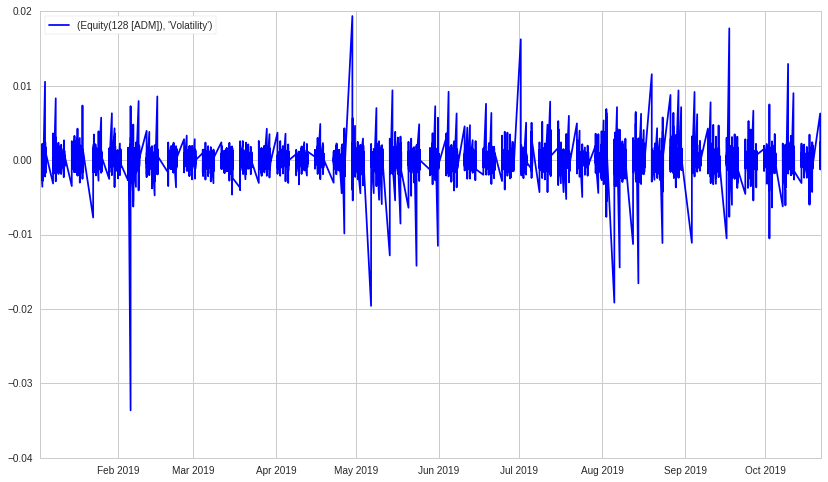

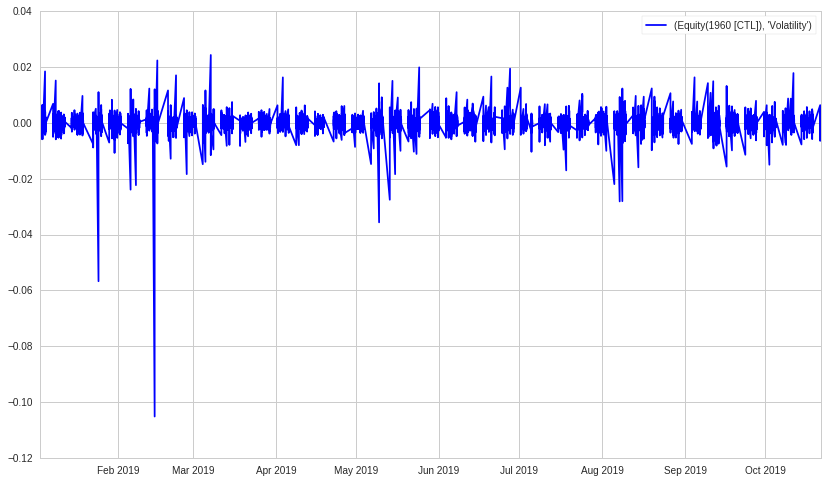

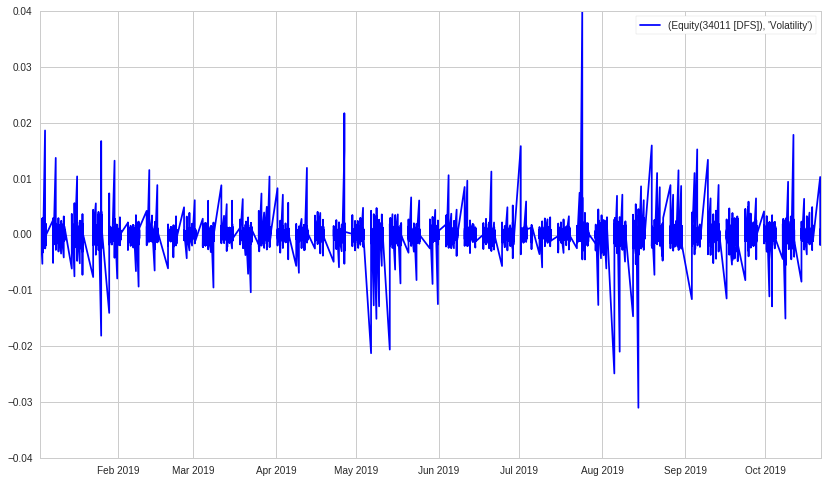

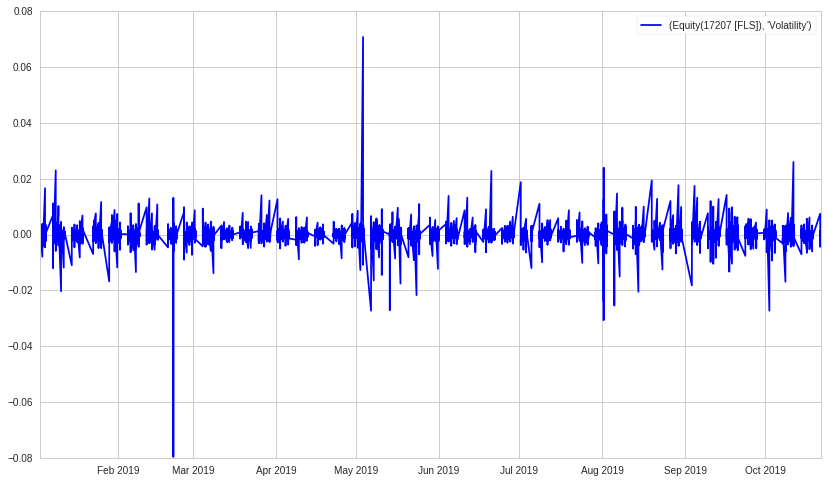

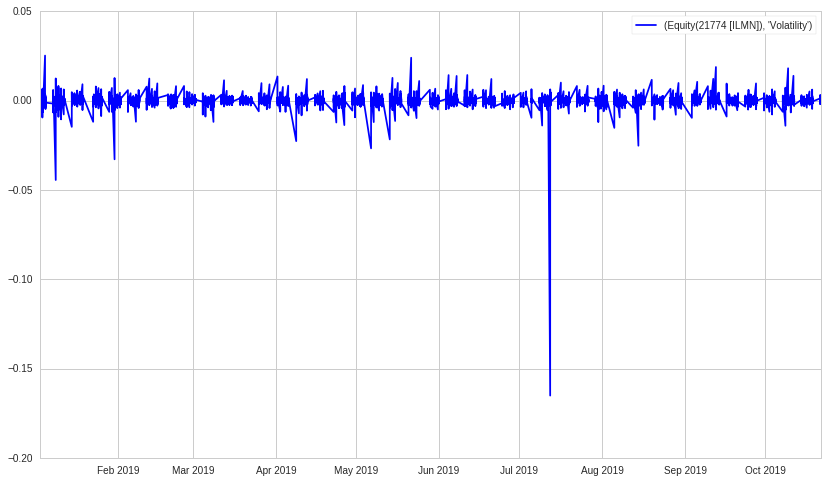

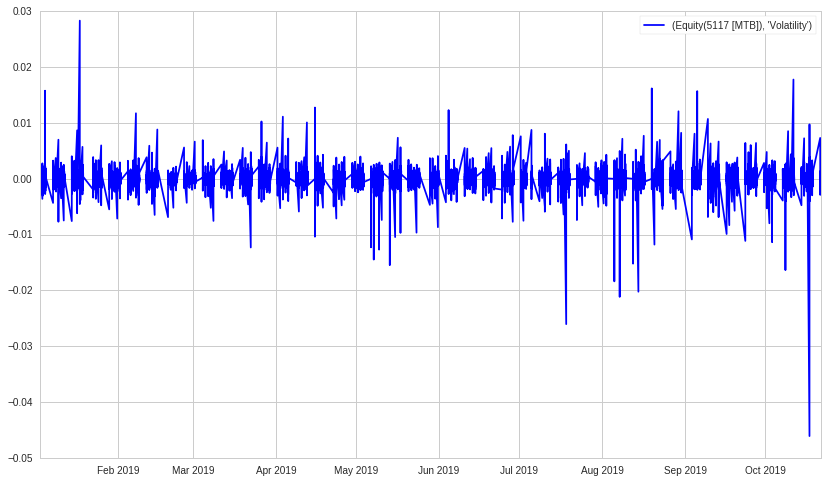

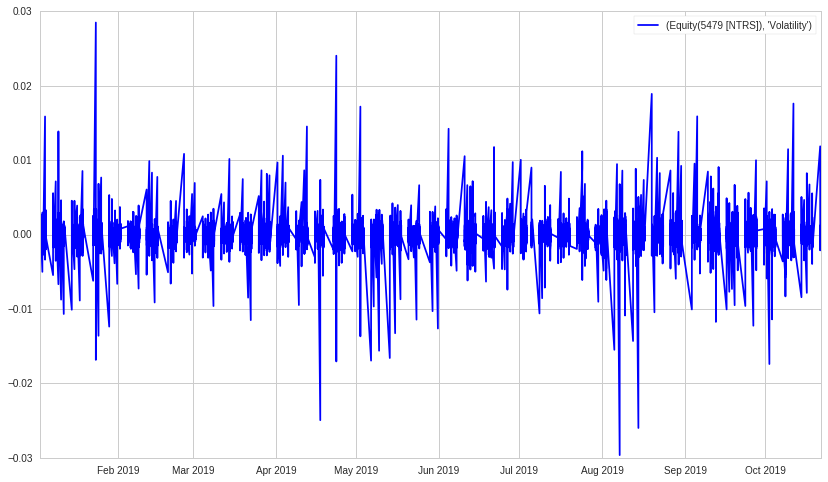

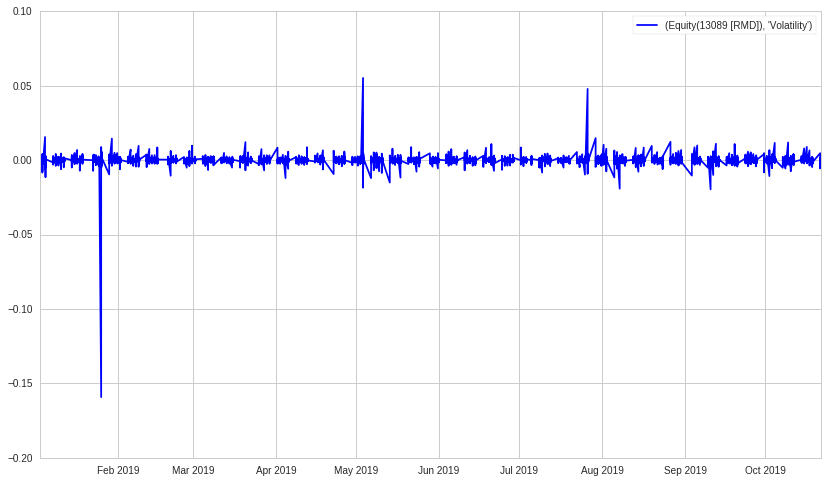

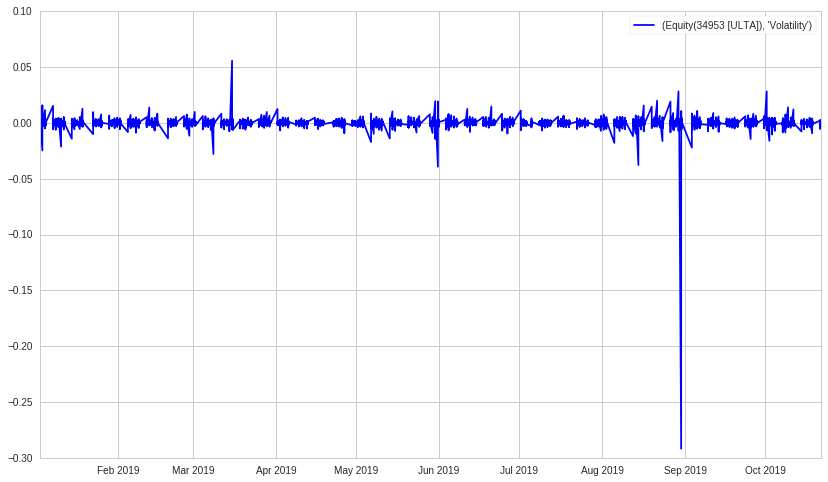

In [10]:
for i in range(1,900,50):
    plt.plot(data[data.columns[i]], color = 'b', label =(data.columns[i],'Volatility'))
    plt.legend(loc='best')
    plt.show()

### Portfolio Optimization Approach
Maximize expected return based on a given level of market risk - Modern Portfolio Theory (MPT)

In [11]:
# Set seed (optional)
np.random.seed(101)
log_ret = data.copy()
# Stock Columns
print('Stocks')
print(data.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(data.columns)))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) 
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() , weights)))
print(exp_vol)
print('\n')

# Minute Sharpe Ratio 
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index([   Equity(523 [AAN]), Equity(42091 [ACHC]), Equity(12616 [ACIW]),
       Equity(50390 [ADNT]),  Equity(2371 [ATGE]),  Equity(33831 [ACM]),
        Equity(26553 [ACC]),  Equity(11086 [AEO]),  Equity(12980 [AFG]),
         Equity(197 [AGCO]),
       ...
       Equity(22857 [WLTW]), Equity(24124 [WYNN]),  Equity(21964 [XEL]),
         Equity(8354 [XRX]),  Equity(8344 [XLNX]),  Equity(42023 [XYL]),
        Equity(17787 [YUM]),  Equity(23047 [ZBH]),  Equity(8399 [ZION]),
        Equity(44060 [ZTS])],
      dtype='object', length=901)


Creating Random Weights
[  5.16398628e-01   5.70667587e-01   2.84742265e-02   1.71521656e-01
   6.85276982e-01   8.33896863e-01   3.06966220e-01   8.93613080e-01
   7.21543862e-01   1.89938954e-01   5.54227591e-01   3.52131954e-01
   1.81892403e-01   7.85601762e-01   9.65483222e-01   2.32353662e-01
   8.35614337e-02   6.03548422e-01   7.28992757e-01   2.76238828e-01
   6.85306329e-01   5.17867474e-01   4.84845374e-02   1.37869238e-01
   1.869674

Now I simulate a monte carlo to get back the weights that give the highest sharpe ratio. I restricted the simulations to 10 due to limited research memory capacity.

In [20]:
num_ports = 10

all_weights = np.zeros((num_ports,len(data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(data.columns)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights))

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [21]:
# Check how many minutes per trading day we got
len(data.ix['2019-10-21']) #-----> 6.5hours

390

In [22]:
#Position of highest sharpe ratio
sharpe_arr.argmax()

5

In [23]:
#Check the size of the weights that gave highest sharpe ratio
all_weights[sharpe_arr.argmax(),:].shape

(901,)

In [24]:
#Multiply the weights by their respective stock for each minute
data = data*all_weights[sharpe_arr.argmax(),:]
data.head()

,Equity(523 [AAN]),Equity(42091 [ACHC]),Equity(12616 [ACIW]),Equity(50390 [ADNT]),Equity(2371 [ATGE]),Equity(33831 [ACM]),Equity(26553 [ACC]),Equity(11086 [AEO]),Equity(12980 [AFG]),Equity(197 [AGCO]),...,Equity(22857 [WLTW]),Equity(24124 [WYNN]),Equity(21964 [XEL]),Equity(8354 [XRX]),Equity(8344 [XLNX]),Equity(42023 [XYL]),Equity(17787 [YUM]),Equity(23047 [ZBH]),Equity(8399 [ZION]),Equity(44060 [ZTS])
2019-01-02 14:31:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 14:32:00+00:00,0.000000,-0.000005,0.000000,-0.000001,0.000000e+00,-7.197070e-07,0.000000,7.668926e-07,0.000000,0.000000,...,0.000002,4.511003e-07,8.683933e-07,5.718298e-07,3.992936e-07,-0.000001,5.992002e-07,-2.985779e-07,3.925539e-07,0.000000e+00
2019-01-02 14:33:00+00:00,0.000022,0.000006,0.000000,0.000001,0.000000e+00,2.869751e-06,-0.000003,2.221667e-06,0.000000,0.000000,...,0.000002,2.199645e-06,-3.294481e-06,-1.777553e-06,1.389861e-06,-0.000004,4.339160e-07,0.000000e+00,7.968657e-07,0.000000e+00
2019-01-02 14:34:00+00:00,-0.000012,-0.000004,0.000000,0.000007,-2.496716e-06,-9.104835e-07,-0.000002,-8.291350e-06,-0.000003,-0.000006,...,0.000000,-4.324912e-07,-1.886647e-07,6.031792e-07,1.921771e-07,0.000004,-8.676391e-08,3.266088e-08,-2.631077e-07,-2.058547e-07
2019-01-02 14:35:00+00:00,0.000016,0.000002,-0.000006,-0.000006,2.311935e-07,-5.213708e-07,-0.000004,2.307975e-06,0.000000,0.000002,...,-0.000003,-8.112191e-07,-1.272962e-06,-1.025783e-06,-2.265147e-07,-0.000007,-1.033231e-06,-5.487942e-08,-7.976531e-07,6.240966e-07


In [169]:
# Aggregate all returns in one portfolio or synthetic SP900 (Large & Midcap US traded stocks)
new_df = pd.DataFrame()
new_df['SP900_Synthetic'] = data.sum(axis=1)
new_df.head()

,SP900_Synthetic
2019-01-02 14:31:00+00:00,0.000000
2019-01-02 14:32:00+00:00,0.000504
2019-01-02 14:33:00+00:00,-0.000903
2019-01-02 14:34:00+00:00,-0.000024
2019-01-02 14:35:00+00:00,-0.001117


### Check for Stationarity

In [28]:
adf_test(new_df[new_df.columns[0]], new_df.columns[0])

Augmented Dickey-Fuller Test: SP900_Synthetic
ADF test statistic        -34.796710
p-value                     0.000000
# lags used                64.000000
# observations          78925.000000
critical value (5%)        -2.861577
critical value (1%)        -3.430433
critical value (10%)       -2.566789
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Simulate GARCH (1,1)
**Note: The quantopian enviroment doesn't support the garch/arch library. Thus, I had to outsource some codes that help in the simulation process.

In [29]:
import cvxopt
from functools import partial
import math
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera

In [190]:
# Define parameters: Intial Guesses
a0 = 1.0
a1 = 0.1
b1 = 0.8
sigma1 = math.sqrt(a0 / (1 - a1 - b1))
X = new_df.SP900_Synthetic.values
X = X / np.std(X) #NORMALIZE THE RETURNS
X

array([ 0.        ,  1.26907545, -2.27430584, ..., -0.24247162,
       -0.02195878,  0.32652301])

In [191]:
def compare_tails_to_normal(X):
    # Define matrix to store comparisons
    A = np.zeros((2,4))
    for k in range(4):
        A[0, k] = len(X[X > (k + 1)]) / float(len(X)) # Estimate tails of X
        A[1, k] = 1 - stats.norm.cdf(k + 1) # Compare to Gaussian distribution
    return A



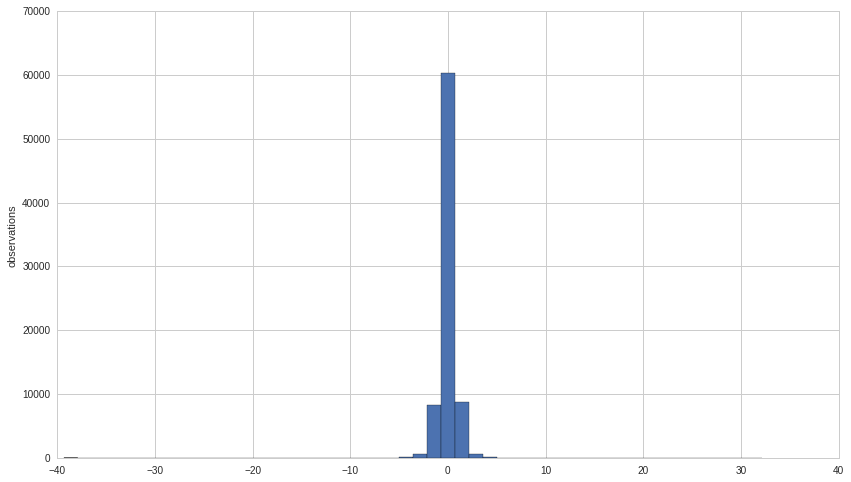

In [192]:
plt.hist(X, bins=50)
plt.ylabel('observations');

In [193]:
# Here's our function to compute the sigmas given the initial guess
def compute_squared_sigmas(X, initial_sigma, theta):
    
    a0 = theta[0]
    a1 = theta[1]
    b1 = theta[2]
    
    T = len(X)
    sigma2 = np.ndarray(T)
    
    sigma2[0] = initial_sigma ** 2
    
    for t in range(1, T):
        # Here's where we apply the equation
        sigma2[t] = a0 + a1 * X[t-1]**2 + b1 * sigma2[t-1]
    
    return sigma2

In [194]:
def negative_log_likelihood(X, theta):
    
    T = len(X)
    
    # Estimate initial sigma squared
    initial_sigma = np.sqrt(np.mean(X ** 2))
    
    # Generate the squared sigma values
    sigma2 = compute_squared_sigmas(X, initial_sigma, theta)
    
    # Now actually compute
    return -sum(
        [-np.log(np.sqrt(2.0 * np.pi)) -
        (X[t] ** 2) / (2.0 * sigma2[t]) -
        0.5 * np.log(sigma2[t]) for
         t in range(T)]
    )

In [195]:

# Make our objective function by plugging X into our log likelihood function
objective = partial(negative_log_likelihood, X)

# Define the constraints for our minimizer
def constraint1(theta):
    return np.array([1 - (theta[1] + theta[2])])

def constraint2(theta):
    return np.array([theta[1]])

def constraint3(theta):
    return np.array([theta[2]])

cons = ({'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2},
        {'type': 'ineq', 'fun': constraint3})

# Actually do the minimization
result = scipy.optimize.minimize(objective, (1, 0.5, 0.5),
                        method='SLSQP',
                        constraints = cons)
theta_mle = result.x
print 'theta MLE: ' + str(theta_mle)

theta MLE: [ 0.06218914  0.25735297  0.74470428]


In [196]:
def check_theta_estimate(X, theta_estimate):
    initial_sigma = np.sqrt(np.mean(X ** 2))
    sigma = np.sqrt(compute_squared_sigmas(X, initial_sigma, theta_estimate))
    epsilon = X / sigma
    print 'Tails table'
    print compare_tails_to_normal(epsilon / np.std(epsilon))
    print ''
    
    _, pvalue, _, _ = jarque_bera(epsilon)
    print 'Jarque-Bera probability normal: ' + str(pvalue)
    
check_theta_estimate(X, theta_mle)

Tails table
[[  7.84782884e-02   1.01405241e-02   2.94974047e-03   1.54449930e-03]
 [  1.58655254e-01   2.27501319e-02   1.34989803e-03   3.16712418e-05]]

Jarque-Bera probability normal: 0.0


In [197]:
# The n-th standardized moment
# skewness is 3, kurtosis is 4
def standardized_moment(x, mu, sigma, n):
    return ((x - mu) ** n) / (sigma ** n)

In [198]:
def gmm_objective(X, W, theta):
    # Compute the residuals for X and theta
    initial_sigma = np.sqrt(np.mean(X ** 2))
    sigma = np.sqrt(compute_squared_sigmas(X, initial_sigma, theta))
    e = X / sigma
    
    # Compute the mean moments
    m1 = np.mean(e)
    m2 = np.mean(e ** 2) - 1
    m3 = np.mean(standardized_moment(e, np.mean(e), np.std(e), 3))
    m4 = np.mean(standardized_moment(e, np.mean(e), np.std(e), 4) - 3)
    
    G = np.matrix([m1, m2, m3, m4]).T
    
    return np.asscalar(G.T * W * G)

def gmm_variance(X, theta):
    # Compute the residuals for X and theta    
    initial_sigma = np.sqrt(np.mean(X ** 2))
    sigma = np.sqrt(compute_squared_sigmas(X, initial_sigma, theta))
    e = X / sigma

    # Compute the squared moments
    m1 = e ** 2
    m2 = (e ** 2 - 1) ** 2
    m3 = standardized_moment(e, np.mean(e), np.std(e), 3) ** 2
    m4 = (standardized_moment(e, np.mean(e), np.std(e), 4) - 3) ** 2
    
    # Compute the covariance matrix g * g'
    T = len(X)
    s = np.ndarray((4, 1))
    for t in range(T):
        G = np.matrix([m1[t], m2[t], m3[t], m4[t]]).T
        s = s + G * G.T
    
    return s / T

In [199]:
# Initialize GMM parameters
W = np.identity(4)
gmm_iterations = 10

# First guess
theta_gmm_estimate = theta_mle

# Perform iterated GMM
for i in range(gmm_iterations):
    # Estimate new theta
    objective = partial(gmm_objective, X, W)
    result = scipy.optimize.minimize(objective, theta_gmm_estimate, constraints=cons)
    theta_gmm_estimate = result.x
    print 'Iteration ' + str(i) + ' theta: ' + str(theta_gmm_estimate)
    
    # Recompute W
    W = np.linalg.inv(gmm_variance(X, theta_gmm_estimate))
    

check_theta_estimate(X, theta_gmm_estimate)

Iteration 0 theta: [  1.09470261e+02   1.54304366e-02   9.89728621e-01]
Iteration 1 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 2 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 3 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 4 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 5 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 6 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 7 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 8 theta: [ 1.7861682   0.95360228  0.04639772]
Iteration 9 theta: [ 1.7861682   0.95360228  0.04639772]
Tails table
[[  7.57437650e-02   1.25079124e-02   3.70933029e-03   1.86099506e-03]
 [  1.58655254e-01   2.27501319e-02   1.34989803e-03   3.16712418e-05]]

Jarque-Bera probability normal: 0.0


In [215]:
sigma_hats = np.sqrt(compute_squared_sigmas(X, np.sqrt(np.mean(X**2)), theta_mle))
initial_sigma = sigma_hats[-1]
initial_sigma

0.58661430289645178

In [217]:
params = [1.7861682 ,0.95360228, 0.04639772, 0.58661430289645178] #list of my findings so that i dont run all optimization code again

In [222]:
a0_estimate = theta_gmm_estimate[0]
a1_estimate = theta_gmm_estimate[1]
b1_estimate = theta_gmm_estimate[2]
def forecast_GARCH(T, a0, a1, b1, sigma1):
    
    # Initialize our values to hold log returns
    X = np.ndarray(T)
    #Setting up starting values
    sigma = np.ndarray(T)
    sigma[0] = sigma1
    
    for t in range(1, T):
        # Draw the next return
        X[t - 1] = sigma[t - 1] * np.random.normal(0, 1)
        # Draw the next sigma_t
        sigma[t] = math.sqrt(a0 + b1 * sigma[t - 1]**2 + a1 * X[t - 1]**2)
        
    X[T - 1] = sigma[T - 1] * np.random.normal(0, 1)    
    
    return X, sigma
X_forecast, sigma_forecast = forecast_GARCH(1000, a0_estimate, a1_estimate, b1_estimate, initial_sigma)

### Forecast 390 Minutes into the future

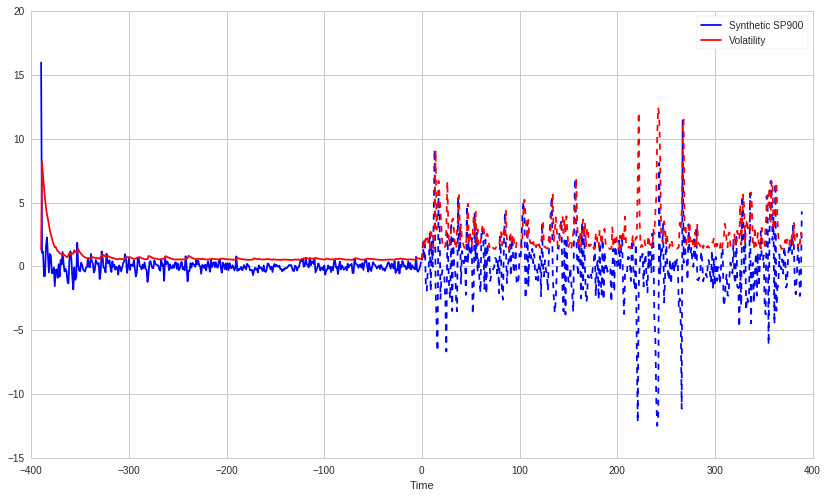

In [225]:
plt.plot(range(-390,0),X[-390:], 'b-')
plt.plot(range(-390,0),sigma_hats[-390:], 'r-')
plt.plot(range(0,390),X_forecast[:390], 'b--')
plt.plot(range(0,390),sigma_forecast[:390], 'r--')
plt.xlabel('Time')
plt.legend(['Synthetic SP900', 'Volatility']);

### Alternative Data 

In [27]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.filters import StaticAssets
from quantopian.research import run_pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.classifiers.fundamentals import SuperSector
from quantopian.pipeline.factors import MarketCap, Latest, DailyReturns

def get_data(stocks, start, end):
    """Get sector codes for a set of stocks for a particular date."""
    result = run_pipeline(
        Pipeline(columns={'sector': Sector(), 'Close': USEquityPricing.close.latest, 'Return':DailyReturns(), 'MarketCap' : MarketCap(), 'SuperSector': SuperSector()}, screen=StaticAssets(stocks)),
        start_date=start,
        end_date=end
    )
    # result will have a pd.MultiIndex whose first level just contains `date`.
    # Drop the first level so that we just get assets as our index.
#     sector_codes = result['sector'].reset_index(level=0, drop=True)
    result['sector'] = result['sector'].map(Sector.SECTOR_NAMES)
    result['SuperSector'] = result['SuperSector'].map(SuperSector.SUPER_SECTOR_NAMES)
#     result['Return'] = result['Return'].apply(lambda x: np.log(x)) 
    # Convert integral sector codes to human-readable strings by doing a lookup
    # from Sector.SECTOR_NAMES, which is a dict mapping codes to strings.
    #
    # This is purely for readability of the charts below. 
    # We could proceed with the rest of the notebook using sector codes and it would work just fine.
    return result

In [29]:
universe = symbols(
    sp_tickers
)
prices = get_data(universe, '2002-01-04', '2019-10-09')

In [30]:
prices
# prices.groupby(prices['sector'])

Close     MarketCap  \
2002-01-04 00:00:00+00:00 Equity(2 [ARNC])       36.13  3.019273e+10   
                          Equity(24 [AAPL])      23.55  7.702723e+09   
                          Equity(53 [ABMD])      15.45  3.306821e+08   
                          Equity(62 [ABT])       55.85  3.891625e+10   
                          Equity(67 [ADSK])      38.55  2.042506e+09   
                          Equity(76 [TAP])       52.24  1.928816e+09   
                          Equity(110 [RAMP])     17.98  1.518489e+09   
                          Equity(114 [ADBE])     33.09  7.364798e+09   
                          Equity(122 [ADI])      47.65  1.617604e+10   
                          Equity(128 [ADM])      14.03  9.509529e+09   
                          Equity(161 [AEP])      43.63  1.402689e+10   
                          Equity(166 [AES])      16.52  8.715425e+09   
                          Equity(185 [AFL])      23.55  1.282454e+10   
                          Equity(197 [AGCO])     15.82  1.136094e+09   
                          Equity(216 [HES])      61.33  5.543341e+09   
                          Equity(239 [AIG])      78.56  1.737669e+11   
                          Equity(266 [AJG])      33.29  2.921311e+09   
                          Equity(270 [AKRX])      3.84  7.764876e+07   
                          Equity(300 [ALK])      29.95  7.719755e+08   
                          Equity(337 [AMAT])     45.48  3.284200e+10   
                          Equity(351 [AMD])      19.31  5.389660e+09   
                          Equity(353 [AME])      31.95  1.062553e+09   
                          Equity(368 [AMGN])     54.26  5.900865e+10   
                          Equity(410 [AN])       12.27  4.006847e+09   
                          Equity(438 [AON])      35.55  9.562613e+09   
                          Equity(448 [APA])      47.49  6.838241e+09   
                          Equity(460 [APD])      46.99  1.071022e+10   
                          Equity(465 [APH])      49.43  2.032458e+09   
                          Equity(523 [AAN])      13.80  2.697309e+08   
                          Equity(538 [ARW])      31.60  2.980753e+09   
...                                                ...           ...   
2019-10-09 00:00:00+00:00 Equity(49271 [OLLI])   55.16  3.505051e+09   
                          Equity(49288 [LITE])   51.63  3.985513e+09   
                          Equity(49413 [PEN])   137.81  4.794125e+09   
                          Equity(49501 [LIVN])   68.92  3.335154e+09   
                          Equity(49506 [HPE])    13.84  1.808258e+10   
                          Equity(49830 [UA])     17.35  8.198643e+09   
                          Equity(49925 [NGVT])   79.88  3.346524e+09   
                          Equity(50049 [FTV])    64.24  2.155466e+10   
                          Equity(50325 [VVV])    21.50  4.046084e+09   
                          Equity(50390 [ADNT])   19.73  1.848073e+09   
                          Equity(50430 [LW])     76.56  1.118402e+10   
                          Equity(50716 [DXC])    26.33  6.897472e+09   
                          Equity(50835 [AM])      6.78  3.436759e+09   
                          Equity(50910 [JHG])    20.05  3.768476e+09   
                          Equity(51012 [BHGE])   21.38  2.194802e+10   
                          Equity(51016 [JBGS])   38.80  5.205469e+09   
                          Equity(51046 [BHF])    35.17  3.917183e+09   
                          Equity(51157 [DD])     64.91  4.839672e+10   
                          Equity(51494 [DLPH])   12.16  1.060144e+09   
                          Equity(51928 [NVT])    19.06  3.223303e+09   
                          Equity(51966 [APY])    24.00  1.861360e+09   
                          Equity(52064 [EVRG])   65.01  1.530774e+10   
                          Equity(52592 [LIN])   184.02  9.952830e+10   
                          Equity(52594 [ETRN])   13.94  3.552939e+09   
                 